<a href="https://colab.research.google.com/github/Dildarshahshah/pca-visualization/blob/main/pca_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is PCA?**

PCA (Principal Component Analysis) reduces the dimensionality of data by finding the directions (called principal components) that capture the most variance (information).

Original shape of data: (1797, 64)
Shape after PCA: (1797, 2)


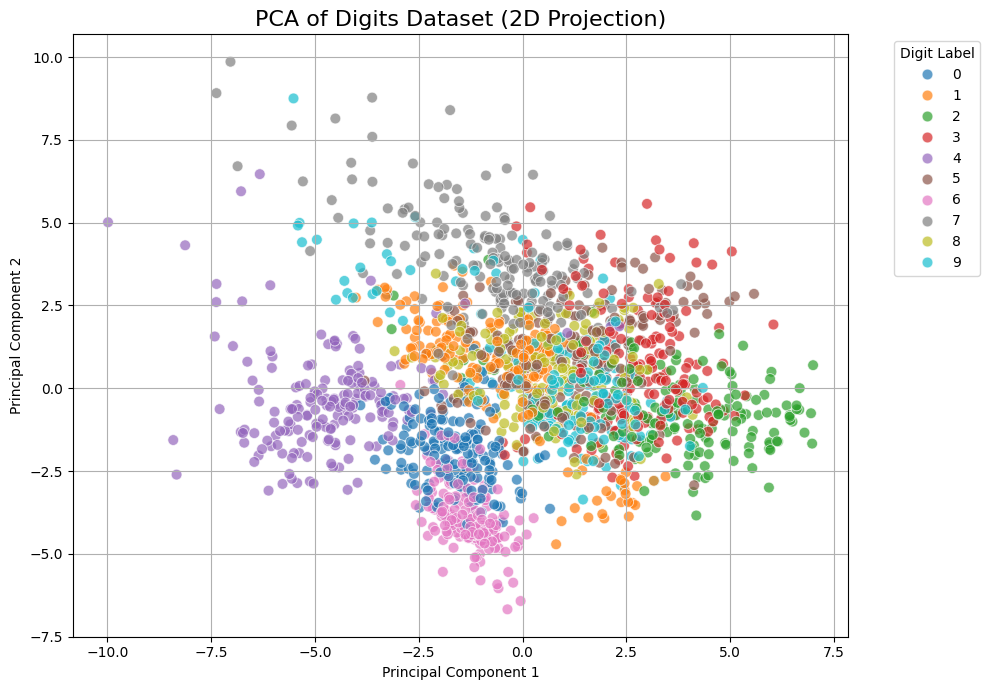

Explained variance by each component: [0.12033916 0.09561054]


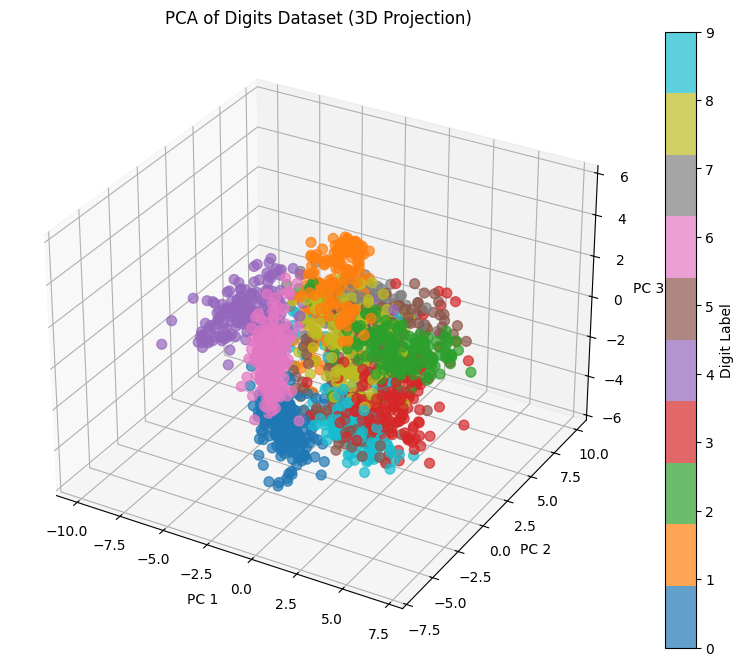

In [2]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits  # Sample high-dimensional dataset
from sklearn.preprocessing import StandardScaler

# Step 2: Load a high-dimensional dataset
# We'll use the Digits dataset (64 features = 8x8 images of handwritten digits)
digits = load_digits()
X = digits.data         # This is our matrix (n_samples x n_features)
y = digits.target       # Labels (digits 0-9)

print("Original shape of data:", X.shape)  # e.g., (1797, 64)

# Step 3: Standardize the data
# PCA is affected by scale, so we normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
# Let's reduce to 2 components for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)  # e.g., (1797, 2)

# Step 5: Visualize the results in 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=60, alpha=0.7)
plt.title("PCA of Digits Dataset (2D Projection)", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Digit Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: (Optional) Visualize explained variance
explained = pca.explained_variance_ratio_
print("Explained variance by each component:", explained)

# 3D PCA
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=y, cmap='tab10', s=50, alpha=0.7)
ax.set_title("PCA of Digits Dataset (3D Projection)")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.colorbar(scatter, label="Digit Label")
plt.show()


**Why is PCA Sensitive to Feature Scaling?**

PCA works by finding directions (principal components) in which the data varies the most. It does this by calculating the covariance matrix of the data.

**The Problem:**
If one feature has a much larger scale (e.g., income in dollars vs. age in years), it dominates the variance, even if it's not actually more important. PCA will mistakenly assign more importance to that feature simply because its values are larger in magnitude.

**Visualizing PCA With and Without Scaling**

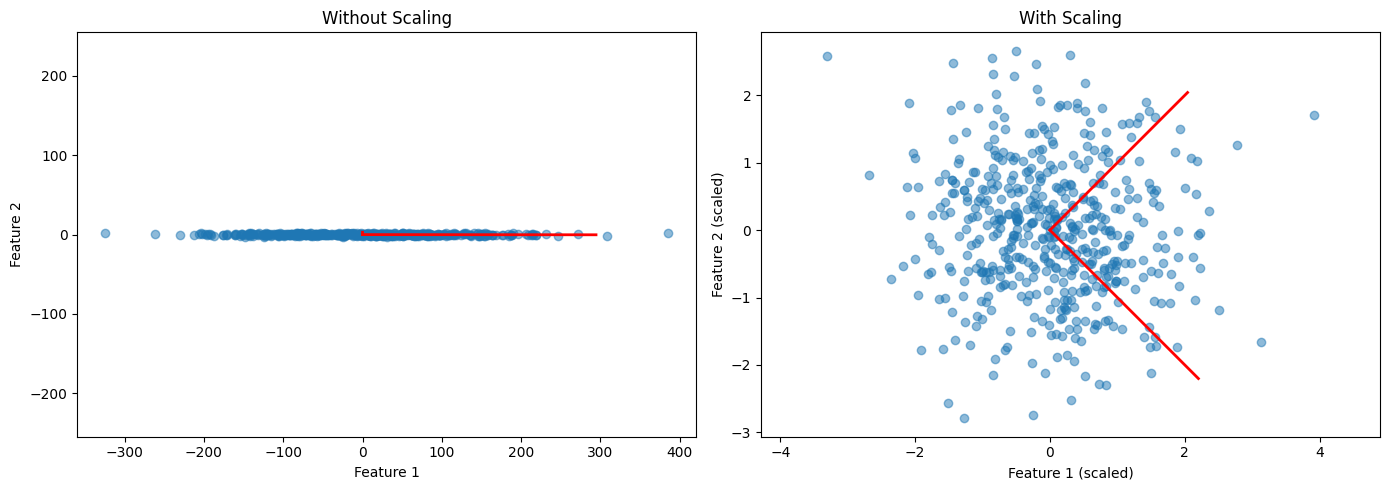

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create synthetic 2D data: one feature has large scale, one has small scale
np.random.seed(42)
x1 = np.random.normal(0, 100, 500)  # large scale
x2 = np.random.normal(0, 1, 500)    # small scale
X = np.column_stack((x1, x2))

# Plot original data
plt.figure(figsize=(14, 5))

# Without scaling
pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(X)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca1.explained_variance_, pca1.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], color='red', linewidth=2)
plt.title("Without Scaling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal')

# With scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
for length, vector in zip(pca2.explained_variance_, pca2.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], color='red', linewidth=2)
plt.title("With Scaling")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.axis('equal')

plt.tight_layout()
plt.show()


**Left plot (no scaling): The red arrow (first principal component) points mostly along the X-axis because that feature had high variance due to large scale.**

**Right plot (with scaling): The PCA components now reflect the actual data structure and variance, not just the size of the numbers.**